In [ ]:
!pip install tweet-preprocessor -q
!pip install contractions -q
!pip install swifter -q
!sudo apt-get install p7zip-full -y
!pip install kaggle -q
!pip install nltk
!pip install textblob -q
!pip install wordcloud -q
!pip install --upgrade gensim --pre
!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

     |████████████████████████████████| 106 kB 7.5 MB/s 
     |████████████████████████████████| 287 kB 53.5 MB/s 
     |████████████████████████████████| 647 kB 8.8 MB/s 
     |████████████████████████████████| 281 kB 39.5 MB/s 
     |████████████████████████████████| 140 kB 29.5 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensi

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "akhilkathi97"
os.environ['KAGGLE_KEY'] = "b1a7ecbde49a15f7d8c855d7171c1f61"
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

100% 25.7M/25.7M [00:00<00:00, 118MB/s] 
100% 25.7M/25.7M [00:00<00:00, 102MB/s]


In [ ]:
!7z e imdb-dataset-of-50k-movie-reviews.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 26962657 bytes (26 MiB)

Extracting archive: imdb-dataset-of-50k-movie-reviews.zip
--
Path = imdb-dataset-of-50k-movie-reviews.zip
Type = zip
Physical Size = 26962657

  0%     24% - IMDB Dataset.csv                        48% - IMDB Dataset.csv                        72% - IMDB Dataset.csv                        97% - IMDB Dataset.csv                       Everything is Ok

Size:       66212309
Compressed: 26962657


In [ ]:
import preprocessor as p
import contractions 
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob
import os
import csv
import numpy as np 
import pandas as pd
import csv
from tqdm.notebook import tqdm
import numpy as np
tqdm.pandas()

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
stopwords_en = stopwords.words('english')
stemmerSnowball = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
stopwords_en.append('film')
stopwords_en.append('movie')
stopwords_en.append('show')
stopwords_en.append('see')
stopwords_en.append('watch')

In [ ]:
def text_preprocessing(text):
    #Removing Hashtags
    text = re.sub("@[A-Za-z0-9_]+","", text)
    #Removing Mentions
    text = re.sub("#[A-Za-z0-9_]+","", text)
    #Remove <br/> tags
    text = re.sub(r"\<.*\/\>",'',text)
    #Remove emojis
    text=text.encode("ascii","ignore")
    text=text.decode()
    #Remove words containing numbers/digits
    text = re.sub(r'\w*\d\w*',"",text)
    #removing certain sized words
    text=' '.join([i for i in text.split() if len(i)>2])
    #Remove HTML tags
    remove_html_tags = [re.sub(r"\<.*\>",'',word) for word in text.split(" ") ]
    #Remove words inside brackets
    remove_bracket_words = [re.sub(r"\(.*\)",'',word) for word in remove_html_tags ]
    #Expanding contractions
    text = contractions.fix((str(" ".join(remove_bracket_words)).lower()))
    #Words
    words = [re.sub(r'[^\w\s]','',word) for word in text.split(' ')]
    #Correcting Spelling Mistakes
    #correct_words = [parser.parse(_)['result'] for _ in words]
    #Removing StopWords
    without_stop_words =  [re.sub(r'[^\w+]','',word) for word in words if word not in stopwords_en]
    #Stemming
    stemmedWords =  [stemmerSnowball.stem(word) for word in without_stop_words]
    #Lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmedWords]
    #Tokenization
    tokenized = [" ".join(tokenizer.tokenize(word)) for word in lemmatized]

    return re.sub(' +', ' ',str(" ".join(tokenized)))

In [ ]:
data = pd.read_csv('IMDB Dataset.csv')
data['pre_processed_text'] = data['review'].progress_apply(lambda row:text_preprocessing(row))

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
# data.to_csv('pre_processed_file.csv')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression

In [ ]:
data['word_count'] = data['pre_processed_text'].apply(lambda x:len(x))
pos_tweets = data[data['sentiment']=="positive"]
neg_tweets = data[data['sentiment']=="negative"]
pos_len = pos_tweets.shape[0]
neg_len = neg_tweets.shape[0]

In [ ]:
positive_reviews = ""
negative_reviews = ""
for index, row in pos_tweets.iterrows():
    for word in row['pre_processed_text']:
        positive_reviews += " ".join(word)

for index, row in neg_tweets.iterrows():
    for word in row['pre_processed_text']:
        negative_reviews += " ".join(word)

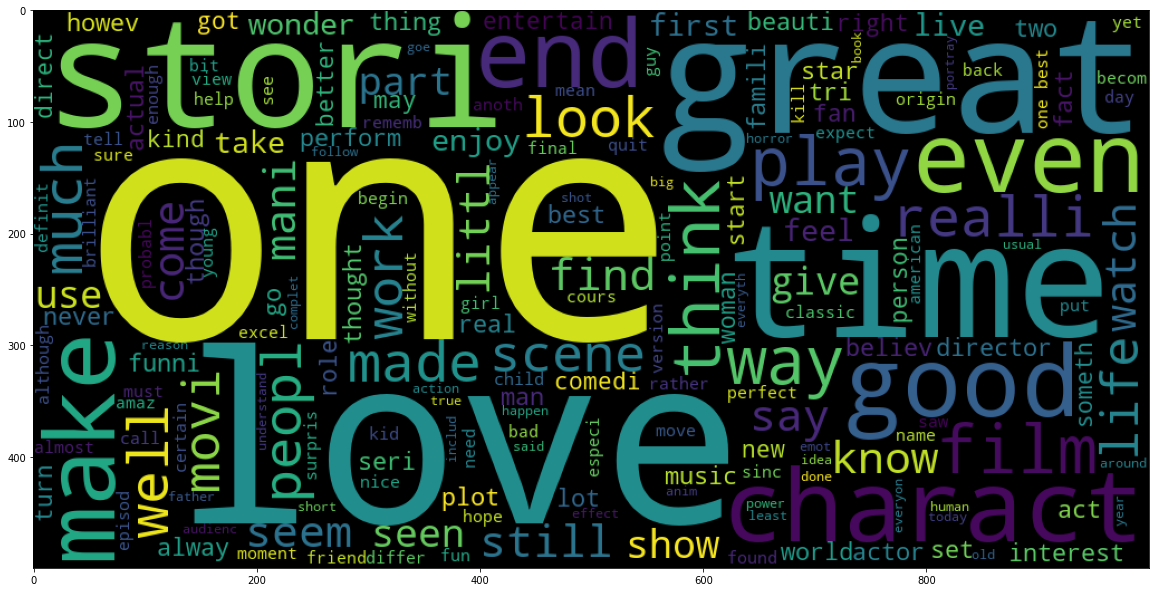

In [ ]:
mpl.rcParams['figure.figsize'] = 20,15
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(positive_reviews)
plt.imshow(wordcloud)

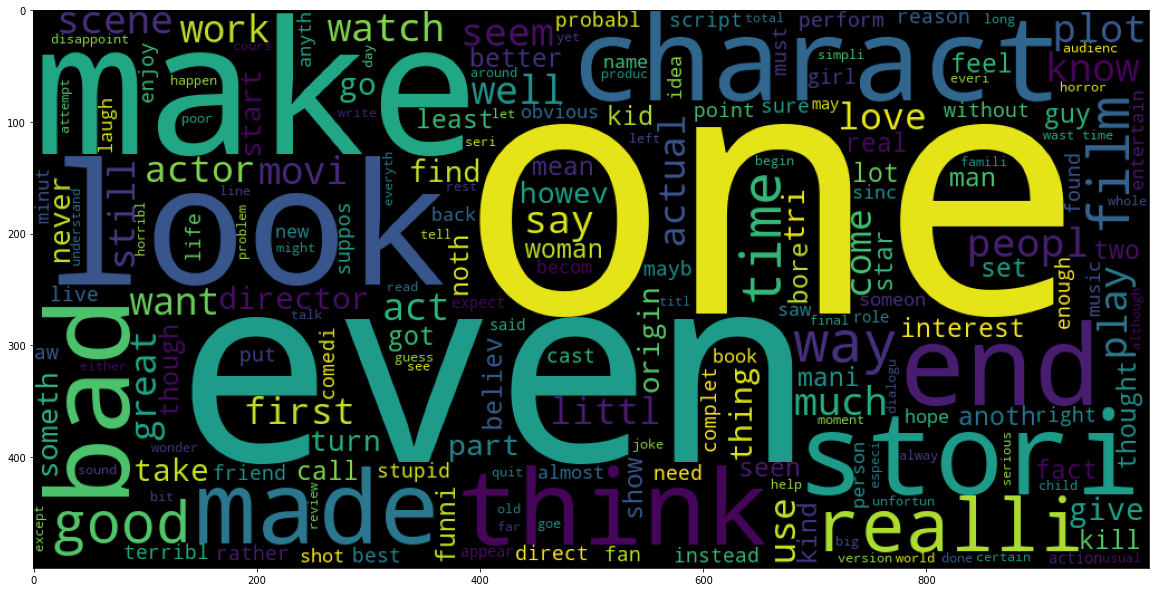

In [ ]:
mpl.rcParams['figure.figsize'] = 20,15
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(negative_reviews)
plt.imshow(wordcloud)

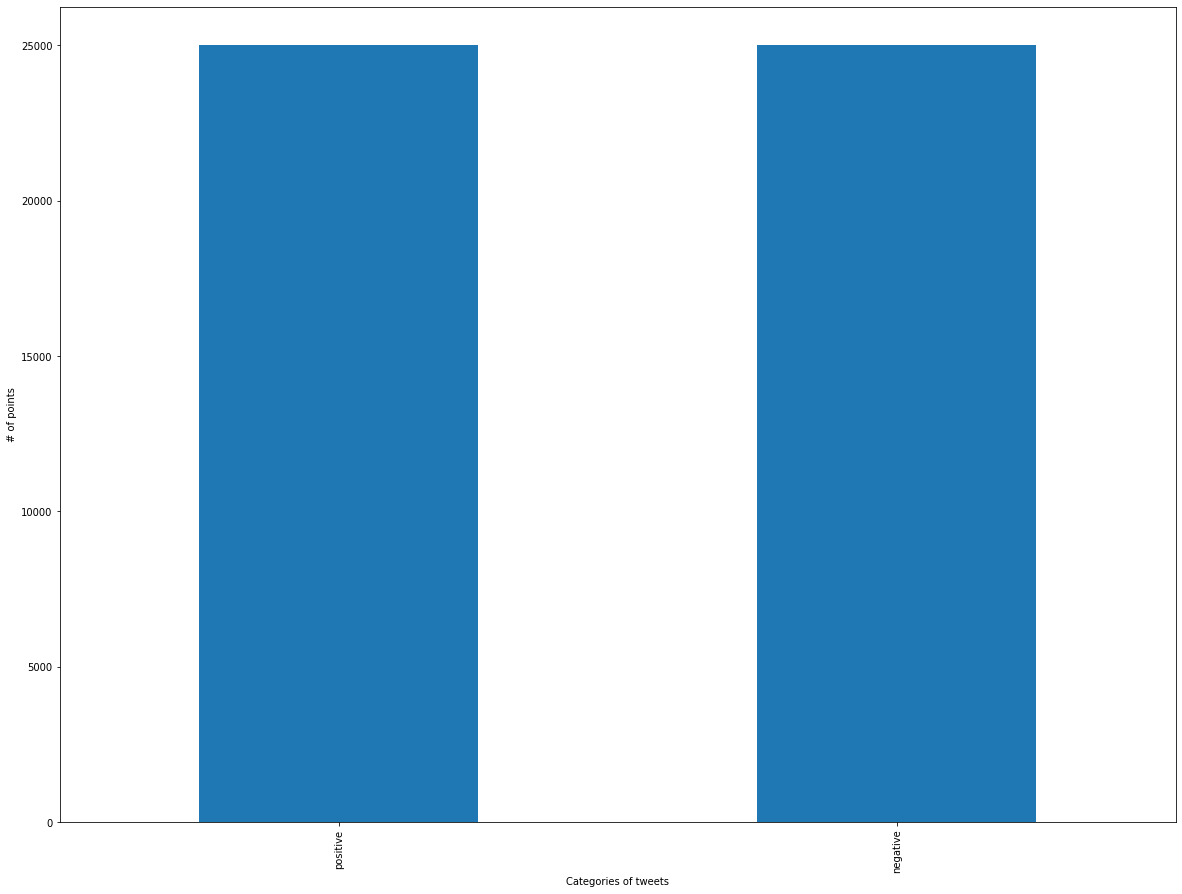

In [ ]:
data["sentiment"].value_counts().plot(kind="bar",xlabel="Categories of tweets",ylabel="# of points")

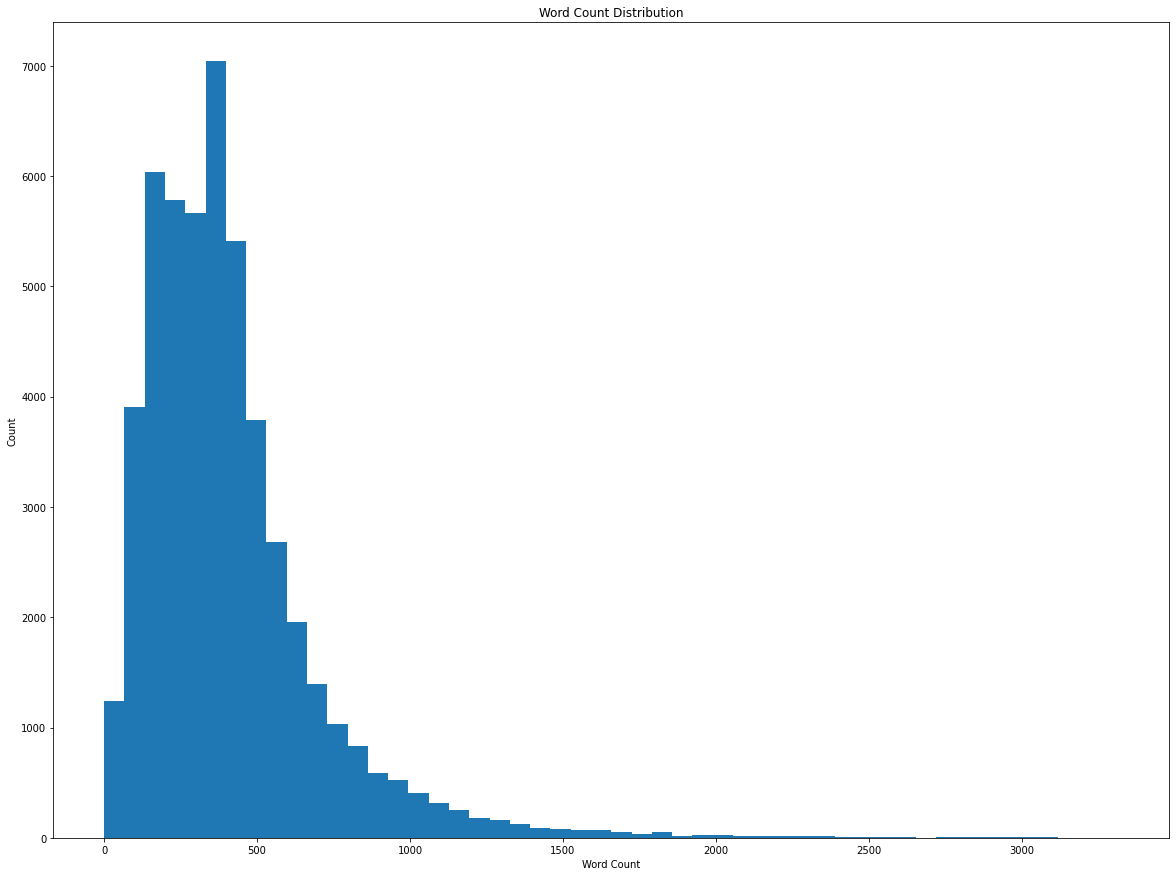

In [ ]:
ax = data['word_count'].plot(kind='hist',bins=50,title='Word Count Distribution')
ax.set(xlabel='Word Count', ylabel='Count')
plt.show()

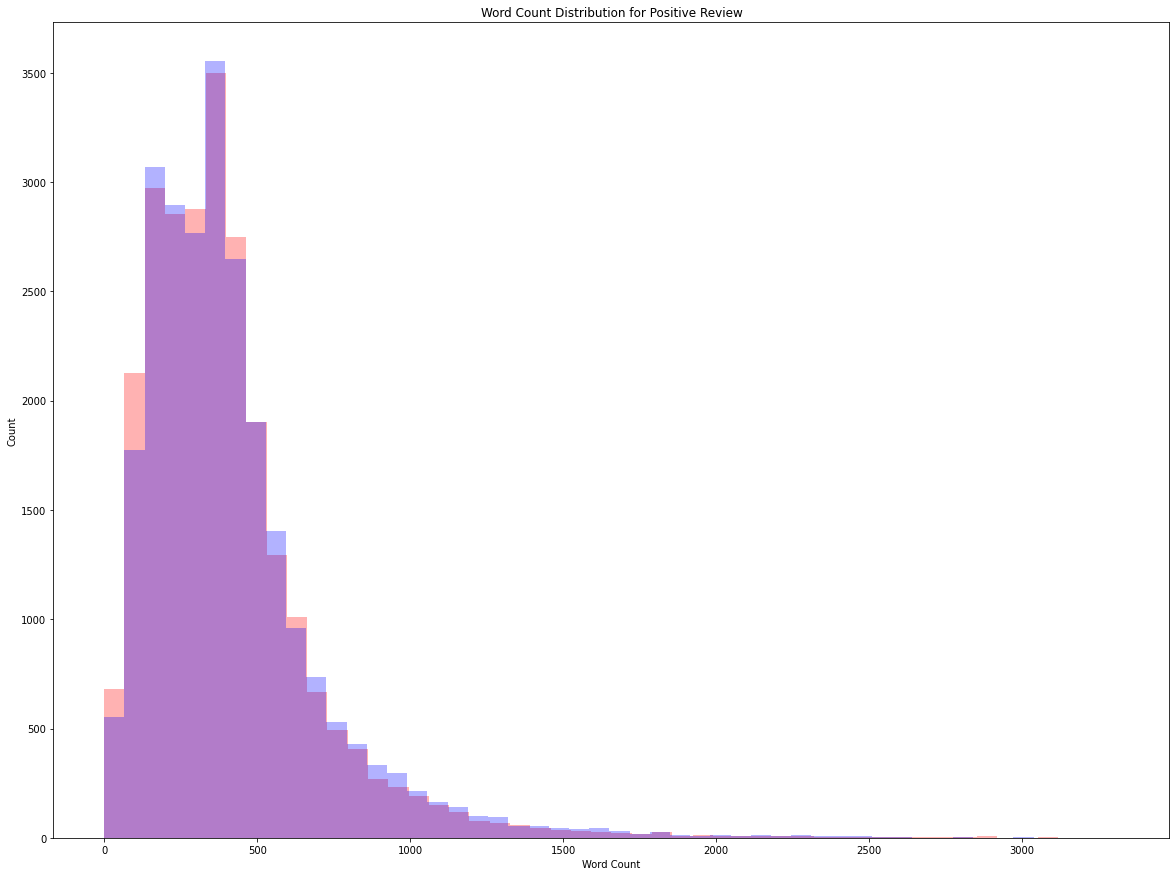

In [ ]:
ax = neg_tweets['word_count'].plot(kind='hist',bins=50,title='Word Count Distribution for Negative Review',color='r', alpha=0.3)
ax = pos_tweets['word_count'].plot(kind='hist',bins=50,title='Word Count Distribution for Positive Review',color='b', alpha=0.3)

ax.set(xlabel='Word Count',ylabel='Count')
plt.show()

In [ ]:
ax.set(xlabel='Word Count',ylabel='Count')
plt.show()

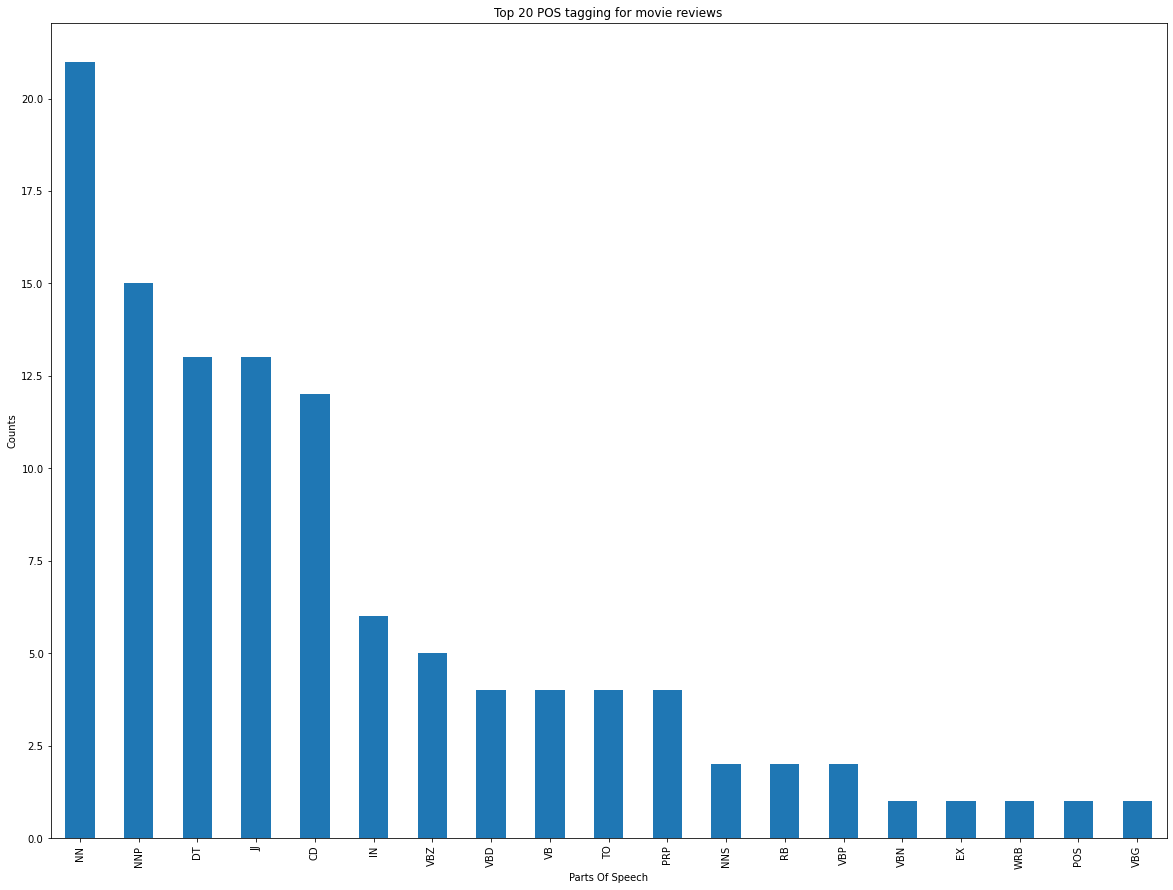

In [ ]:
blob = TextBlob(str(data['review']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar',xlabel='Parts Of Speech',ylabel='Counts', title='Top 20 POS tagging for movie reviews')

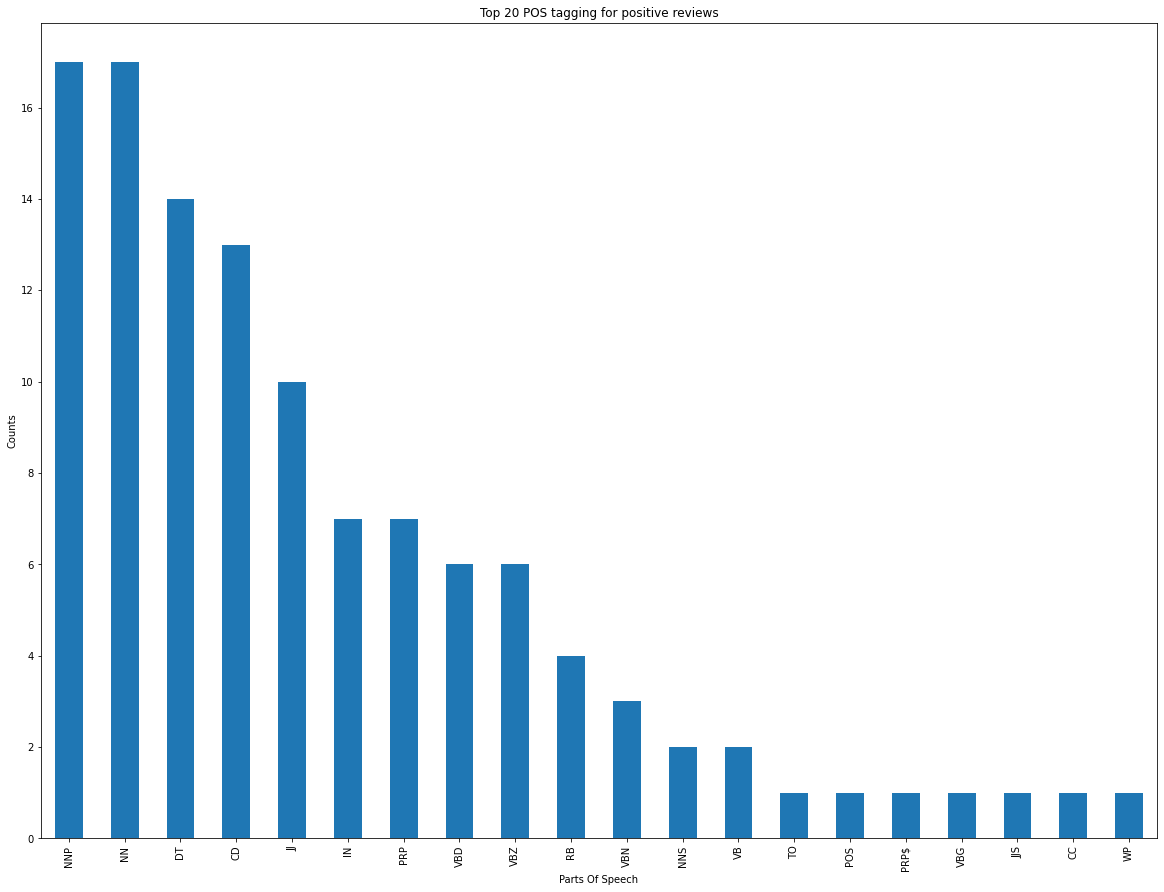

In [ ]:
blob = TextBlob(str(pos_tweets['review']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar',xlabel='Parts Of Speech',ylabel='Counts', title='Top 20 POS tagging for positive reviews')

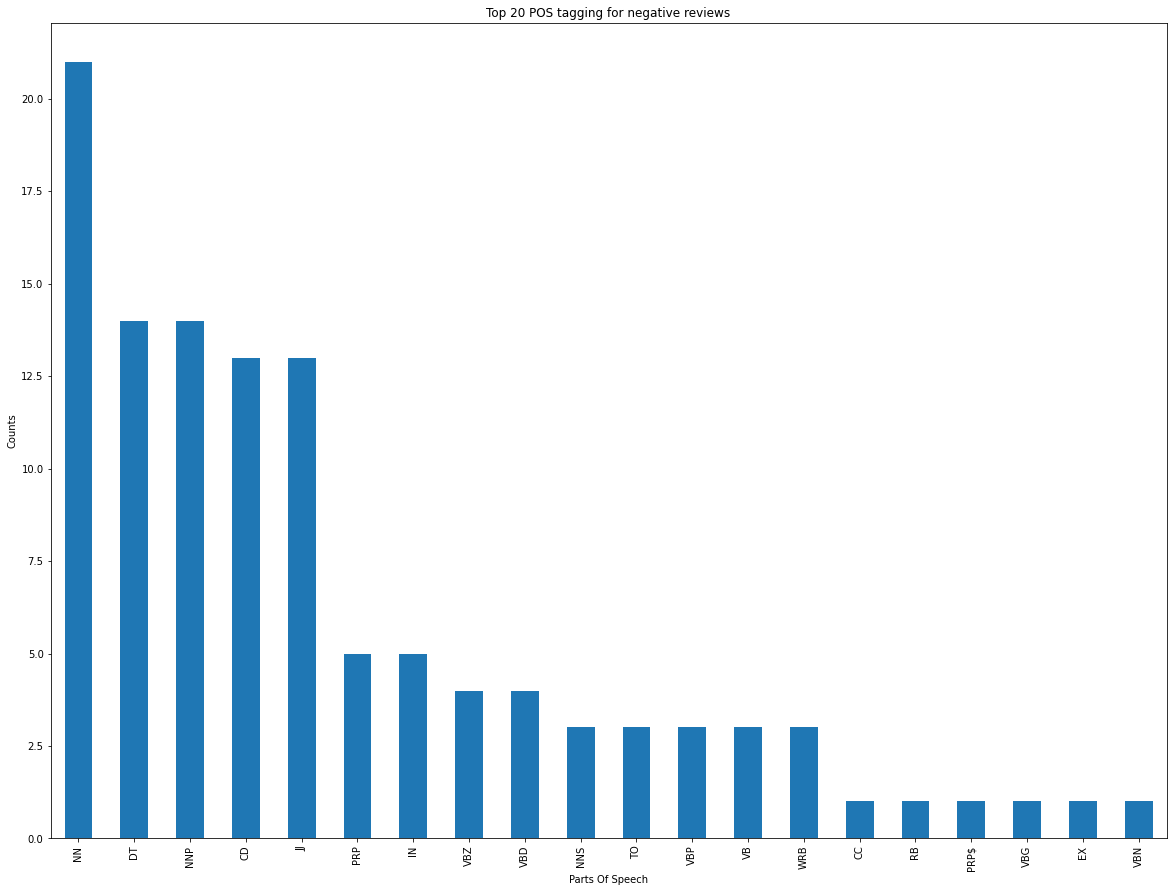

In [ ]:
blob = TextBlob(str(neg_tweets['review']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar',xlabel='Parts Of Speech',ylabel='Counts', title='Top 20 POS tagging for negative reviews')



*   Positive Reviews have a more reviews with more than 500 word count as compared with negative reviews. Hence the tagged POS are way more than negative reviews.
*   Proper nouns are used more in positive reviews compared to negative reviews. It can indicate liking towards cast of the movie. Less proper nouns in negative reviews may indicate general dislike towards story compared to positive reviews.



In [ ]:
#word count,character count,sentence count,average word length,average sentence length

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
data['sentence_count'] = data['review'].apply(lambda x: len(sent_tokenize(x)))
data['stop_words_len'] = data['review'].apply(lambda x: len([_ for _ in x.split() if _ in stopwords_en]))

In [ ]:
pos_sentence_count = data[data['sentiment']=="positive"]['sentence_count']
pos_stop_word_count = data[data['sentiment']=="positive"]['stop_words_len']

In [ ]:
neg_sentence_count = data[data['sentiment']=="negitive"]['sentence_count']
neg_stop_word_count = data[data['sentiment']=="negitive"]['stop_words_len']

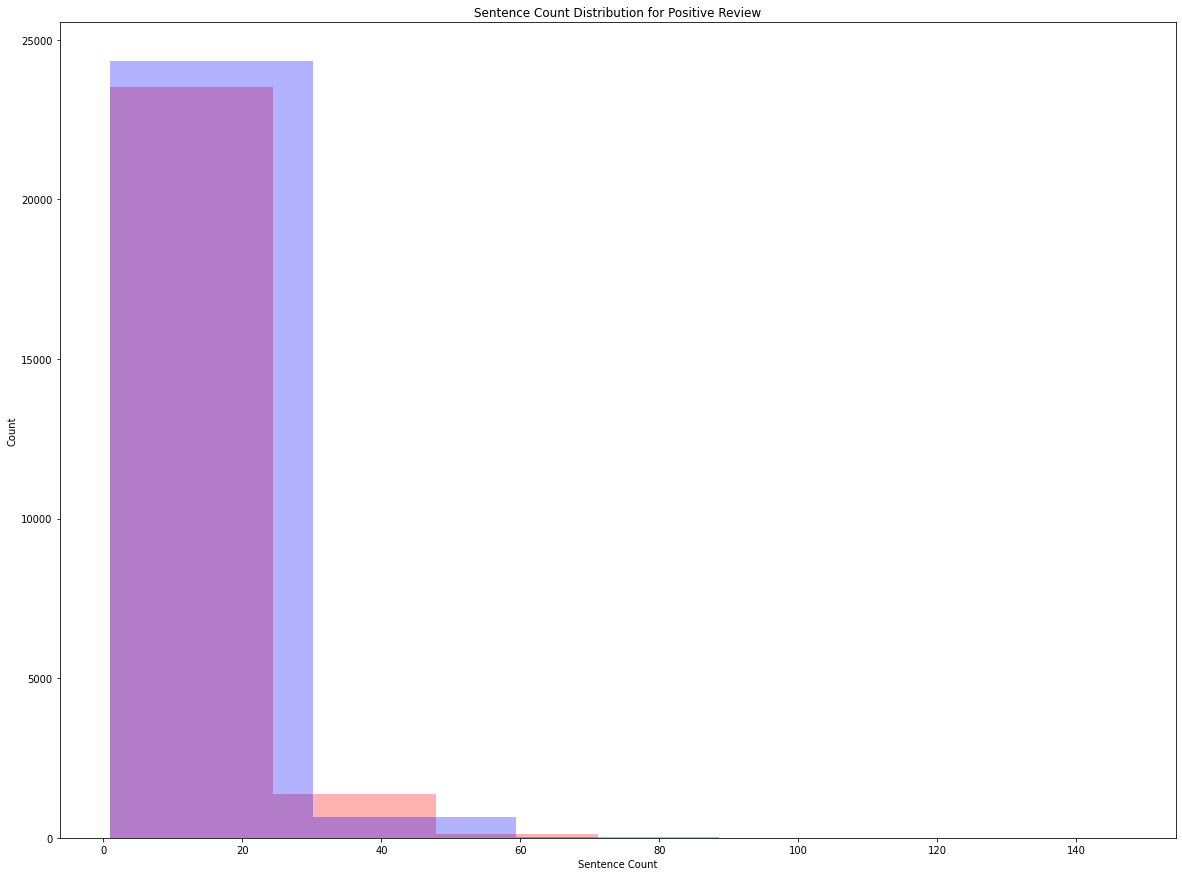

In [ ]:
ax = data[data['sentiment']=="negative"]['sentence_count'].plot(kind='hist',bins=5,title='Sentence Count Distribution for Negative Review',color='r', alpha=0.3)
ax = data[data['sentiment']=="positive"]['sentence_count'].plot(kind='hist',bins=5,title='Sentence Count Distribution for Positive Review',color='b', alpha=0.3)
ax.set(xlabel='Sentence Count',ylabel='Count')
plt.show()

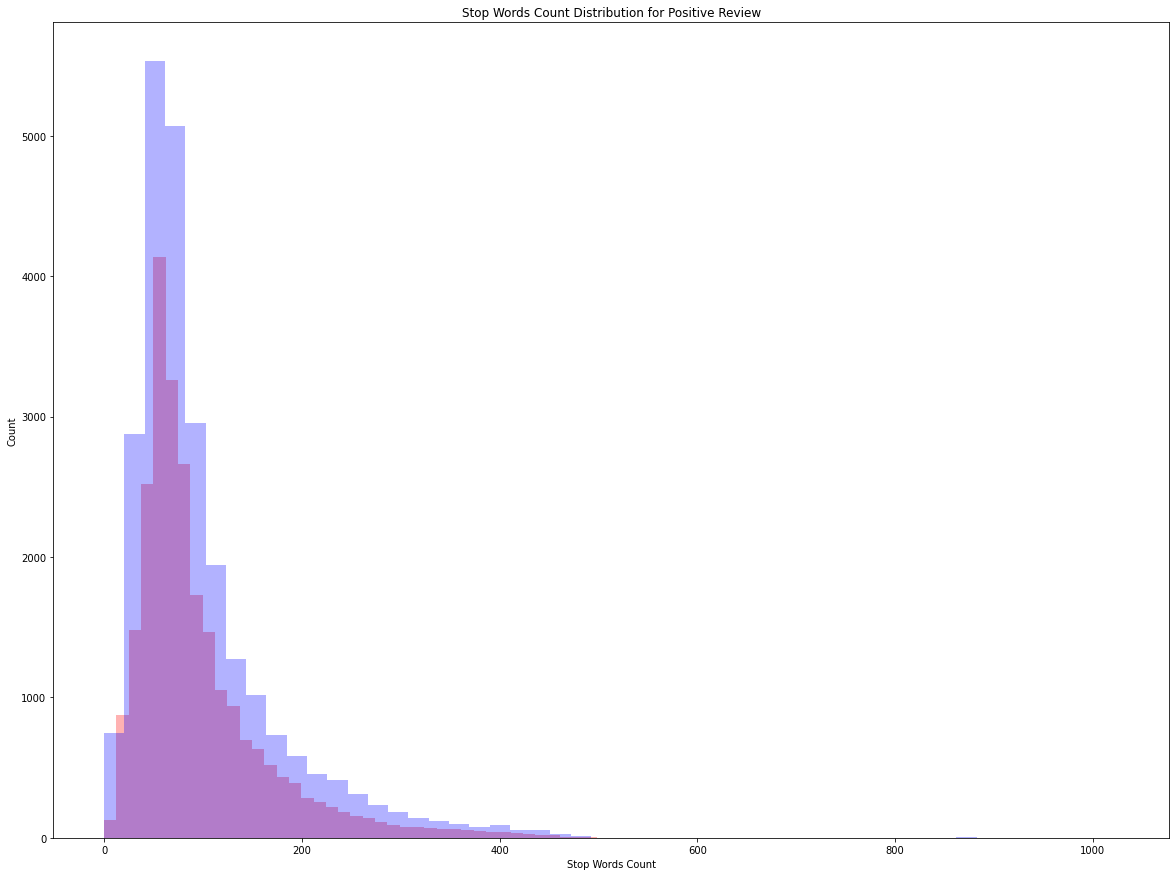

In [ ]:
ax = data[data['sentiment']=="negative"]['stop_words_len'].plot(kind='hist',bins=50,title='Stop Words Count Distribution for Negative Review',color='r', alpha=0.3)
ax = data[data['sentiment']=="positive"]['stop_words_len'].plot(kind='hist',bins=50,title='Stop Words Count Distribution for Positive Review',color='b', alpha=0.3)
ax.set(xlabel='Stop Words Count',ylabel='Count')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
most_common_uni = get_top_text_ngrams(data.pre_processed_text,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_bi = get_top_text_ngrams(data.pre_processed_text,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()